# 경사 하강법(Gradient Descent)

﻿간단한 회귀 식인 y=4x+6을 근사하기 위한 100개의 데이터 세트를 만들고, 여기에 경사 하강법을 이용해 회귀 계수 w1, w0를 도출해보겠습니다.

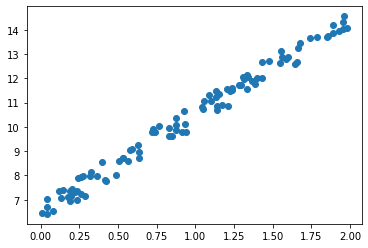

In [75]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
# y = 4x+6을 근사(w1=4, w0=6). 임의의 값은 노이즈를 위해 만듬
X = 2 * np.random.rand(100,1)
y = 6 + 4*X + np.random.rand(100,1)

# X, y 데이터 세트 산점도로 시각화
plt.scatter(X, y)

﻿데이터가 y=4x+6을 중심으로 무작위로 퍼져 있습니다.

In [76]:
len(y)

100

﻿get_cost()는 실제 y 값과 예측된 y 값을 인자로 받아서 예측 오류를 나타냅니다.

In [77]:
# 비용 함수 정의
def get_cost(y, y_pred):
    N = len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [78]:
# w1과 w0를 업데이트 할 w1_update, w0_update를 반환.
def get_weight_updates(w1, w0, X, y, learning_rate=0.01):
    N = len(y)
    #먼저 w1_update, w0_update를 각각 w1, w0의 shape와 동일한 크기를 가진 0 값으로 초기화
    w1_update = np.zeros_like(w1)
    w0_update = np.zeros_like(w0)
    # 예측 배열 계산하고 예측과 실제 값의 차이 계산
    y_pred = np.dot(X, w1.T) + w0
    diff = y-y_pred
    
    # w0_update를 dot 행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N, 1))
    
    # w1과 w0을 업데이트할 w1_update와 w0_update 계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

get_weight_updates를 경사 하강 방식을 반복적으로 수행하여 w1과 w0를 업데이트하는 함수인  
gradient_descent_steps() 함수 생성

In [79]:
# 입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이트 적용함
def gradient_descent_steps(X, y, iters=10000):
    # w0와 w1을 모두 0으로 초기화.
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    # 인자로 주어진 iters 만큼 반복적으로 get_weight_updates() 호출해 w1, w0 업데이트 수행.
    for ind in range(iters):
        w1_update, w0_update = get_weight_updates(w1, w0, X, y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

get_cost() 함수로 예측값과 실제값의 RSS 차이를 계산하고 이를 이용해 경사 하강법의 예측 오류도 계산해 보겠습니다

In [119]:
w1, w0 = gradient_descent_steps(X, y, iters=1000)
print('w1:{0:.3f}, w0:{1:.3f}'.format(w1[0,0], w0[0,0]))
y_pred = w1[0,0] * X + w0
print('Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1:4.028, w0:6.490
Gradient Descent Total Cost:0.0775


실제 선형식은 y=4x+6과 유사하게 w1은 4.028, w0는 6.490이 도출되었습니다.  
예측 오류 비용은 약 0.0775입니다. 마지막으로 예측 선형식을 이용해 산점도 위에 그래프도 그려보겠습니다.

실제 값 y와 예측 값 y_pred의 차이가 작을수록 total cost가 작아진다.

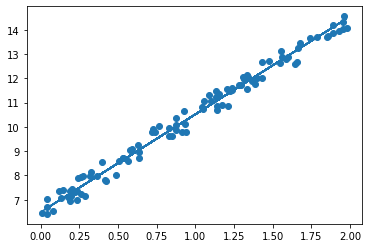

In [82]:
plt.scatter(X,y)
plt.plot(X, y_pred)

# 확률적 경사 하강법(stochastic_gradient_descent_steps)

앞에서 진행한 gradient_descent_steps와 크게 다르지 않지만, 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 이를 기반으로 w1_update, w0_update를 계산하는 부분만 차이가 있습니다

In [121]:
def stochastic_gradient_descent_steps(X, y, batch_size=10, iters=1000):
    w0 = np.zeros((1, 1))
    w1 = np.zeros((1, 1))
    
    for ind in range(iters):
        np.random.seed(ind)
        # 전체 X, y 데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_Y로 저장
        # X.shape가 (100, 1)이기 때문에 100 크기 만큼 permutation을 실행하라는 얘기다.
        stochastic_random_index = np.random.permutation(X.shape[0])
        sample_X = X[stochastic_random_index[0:batch_size]]
        sample_y = y[stochastic_random_index[0:batch_size]]
        
        #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_update, w0_update = get_weight_updates(w1, w0, sample_X, sample_y, learning_rate=0.01)
        w1 = w1 - w1_update
        w0 = w0 - w0_update
    
    return w1, w0

코드를 보면 알겠지만 데이터를 추출할 사이즈인 batch_size를 받아  
sample_X, sample_y를 추출해서 w1, w0를 업데이트할 때 기존의 X, y 대신 사용하는 점이 다릅니다.

In [122]:
w1, w0 = stochastic_gradient_descent_steps(X, y, iters=1000)
print('w1:', round(w1[0,0], 3), 'w0:', round(w0[0,0], 3))
y_pred = w1[0, 0] * X + w0
print('Stocastic Gradient Descent Total Cost:{0:.4f}'.format(get_cost(y, y_pred)))

w1: 4.031 w0: 6.486
Stocastic Gradient Descent Total Cost:0.0777


확률정 경사 하강법으로 구한 w0, w1 결과는 경사 하강법으로 구한 w1, w0와 큰 차이가 없으며, 예측 오류 비용 또한 0.0777로 경사 하강법으로 구한 예측 오류 비용 0.0775보다 아주 조금 높을 뿐으로 큰 예측 성능상의 차이가 없음을 알 수 있습니다. 따라서 큰 데이터를 처리할 경우에는 경사 하강법 대신 일반적으로 확률적 경사 하강법을 이용합니다.